In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#batting statistics of all IND Vs AUS ODIs in the last 10 years from CRICINFO
batting = pd.read_csv('batting stat.csv', encoding = 'ISO-8859-1')
batting.head()

,Player,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date
0,RG Sharma,209,222,158,12,16,132.27,1,v Australia,Bengaluru,02-11-2013
1,SR Tendulkar,175,210,141,19,4,124.11,2,v Australia,Hyderabad (Deccan),05-11-2009
2,RG Sharma,171,205,163,13,7,104.9,1,v Australia,Perth,12-01-2016
3,GJ Bailey,156,139,114,13,6,136.84,1,v India,Nagpur,30-10-2013
4,SPD Smith,149,179,135,11,2,110.37,2,v India,Perth,12-01-2016


In [4]:
team_result = pd.read_csv('team result.csv', encoding = 'ISO-8859-1')
print(team_result.head()) 

    Team Result     Margin    BR  Toss  Bat   Opposition              Ground  \
0  India   lost     4 runs   NaN  lost  2nd  v Australia            Vadodara   
1  India    won    99 runs   NaN  lost  1st  v Australia              Nagpur   
2  India    won  6 wickets  10.0  lost  2nd  v Australia               Delhi   
3  India   lost    24 runs   NaN   won  2nd  v Australia              Mohali   
4  India   lost     3 runs   NaN  lost  2nd  v Australia  Hyderabad (Deccan)   

  Start Date  
0  25-Oct-09  
1  28-Oct-09  
2  31-Oct-09  
3  02-Nov-09  
4  05-Nov-09  


In [5]:
team_result = team_result.drop(['Opposition'],axis = 1) ##unnecessary since redundant
print(team_result.head()) 

    Team Result     Margin    BR  Toss  Bat              Ground Start Date
0  India   lost     4 runs   NaN  lost  2nd            Vadodara  25-Oct-09
1  India    won    99 runs   NaN  lost  1st              Nagpur  28-Oct-09
2  India    won  6 wickets  10.0  lost  2nd               Delhi  31-Oct-09
3  India   lost    24 runs   NaN   won  2nd              Mohali  02-Nov-09
4  India   lost     3 runs   NaN  lost  2nd  Hyderabad (Deccan)  05-Nov-09


In [6]:
#bowling statistics of all IND Vs AUS ODIs in the last 10 years from CRICINFO
bowling = pd.read_csv('bowling stat.csv', encoding = 'ISO-8859-1')
bowling.head()

,Player,Overs,Mdns,Runs,Wkts,Econ,Inns,Opposition,Ground,Start Date
0,YS Chahal,10.0,0,42,6,4.20,1,v Australia,Melbourne,18-01-2019
1,MA Starc,10.0,2,43,6,4.30,1,v India,Melbourne,18-01-2015
2,BW Hilfenhaus,9.3,1,33,5,3.47,2,v India,Brisbane,19-02-2012
3,DE Bollinger,10.0,4,35,5,3.50,1,v India,Guwahati,08-11-2009
4,KW Richardson,10.0,1,68,5,6.80,2,v India,Canberra,20-01-2016


In [7]:
#Current Aus/Ind squad for the ODI series
squad = pd.read_csv('squad.csv', encoding = 'ISO-8859-1')
print(squad.head())

                Player country                  role odi number  \
0          Aaron Finch     aus               batsman        all   
1    Jason Behrendorff     aus                Bowler        all   
2           Alex Carey     aus  Wicketkeeper batsman        all   
3  Nathan Coulter-Nile     aus                Bowler        all   
4          Pat Cummins     aus                Bowler        all   

      Matching_Name  
0          AJ Finch  
1    JP Behrendorff  
2         AT Carey   
3  NM Coulter-Nile   
4       PJ Cummins   


In [8]:
# Modify runs column not outs to different column
batting['out_no'] = batting['Runs'].apply(lambda x: '0' if '*' in x else '1')  # 1 indicates out and 0 not out
print(batting.head())

          Player Runs Mins   BF  4s  6s      SR  Inns   Opposition  \
0     RG Sharma   209  222  158  12  16  132.27     1  v Australia   
1  SR Tendulkar   175  210  141  19   4  124.11     2  v Australia   
2     RG Sharma   171  205  163  13   7   104.9     1  v Australia   
3     GJ Bailey   156  139  114  13   6  136.84     1      v India   
4     SPD Smith   149  179  135  11   2  110.37     2      v India   

               Ground  Start Date out_no  
0           Bengaluru  02-11-2013      1  
1  Hyderabad (Deccan)  05-11-2009      1  
2               Perth  12-01-2016      1  
3              Nagpur  30-10-2013      1  
4               Perth  12-01-2016      1  


In [9]:
batting['Runs'] = batting['Runs'].str.replace('*', '')  #make runs column to numbers
squad = squad.drop(['Player'],axis = 1)
batting = pd.merge(batting, squad, how='left',left_on='Player', right_on='Matching_Name') 
#Do not require stats of people not in squad
batting = batting[~batting.isin([np.nan, np.inf, -np.inf]).any(1)]
batting.head()

,Player,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,out_no,country,role,odi number,Matching_Name
0,RG Sharma,209,222,158,12,16,132.27,1,v Australia,Bengaluru,02-11-2013,1,ind,batsman,all,RG Sharma
2,RG Sharma,171,205,163,13,7,104.9,1,v Australia,Perth,12-01-2016,1,ind,batsman,all,RG Sharma
5,RG Sharma,141,195,123,17,4,114.63,2,v Australia,Jaipur,16-10-2013,1,ind,batsman,all,RG Sharma
6,MS Dhoni,139,169,121,12,5,114.87,1,v Australia,Mohali,19-10-2013,0,ind,Wicketkeeper batsman,all,MS Dhoni
7,RG Sharma,138,228,139,9,4,99.28,1,v Australia,Melbourne,18-01-2015,1,ind,batsman,all,RG Sharma


In [10]:
batting[["Runs", "out_no","4s","6s"]] = batting[["Runs", "out_no","4s","6s"]].apply(pd.to_numeric)

In [11]:
#group wise player name batting average
bat_select = batting[['Player','Runs','4s','6s','out_no']]
player_wise_avg = bat_select.groupby(['Player']).agg(['mean']) ##average 6 & 4s hit by players
print(player_wise_avg.head())

                  Runs        4s        6s    out_no
                  mean      mean      mean      mean
Player                                              
A Zampa       6.500000  0.000000  0.000000  0.500000
AT Carey     15.666667  2.666667  0.000000  1.000000
AT Rayudu    15.666667  1.333333  0.333333  1.000000
B Kumar      15.857143  1.714286  0.000000  0.714286
GJ Maxwell   33.500000  2.944444  1.611111  0.888889


In [12]:
player_wise_count = bat_select.groupby(['Player']).agg(['count'])
print(player_wise_count.head()) #To get the total number of matches played

             Runs    4s    6s out_no
            count count count  count
Player                              
A Zampa         2     2     2      2
AT Carey        3     3     3      3
AT Rayudu       3     3     3      3
B Kumar         7     7     7      7
GJ Maxwell     18    18    18     18


In [13]:
bat_select = bat_select.groupby(['Player']).agg(['sum']) 
##to calculate batting average based on out/notout in individual matches
print(bat_select.head())

            Runs  4s  6s out_no
             sum sum sum    sum
Player                         
A Zampa       13   0   0      1
AT Carey      47   8   0      3
AT Rayudu     47   4   1      3
B Kumar      111  12   0      5
GJ Maxwell   603  53  29     16


In [14]:
bat_select['bat_avg'] = bat_select ['Runs'] / bat_select ['out_no'] #consider only matches in which the batsman was out
bat_select['avg_4'] = player_wise_avg['4s'] 
bat_select['avg_6'] = player_wise_avg ['6s']

In [15]:
bat_select = bat_select[~bat_select.isin([np.nan, np.inf, -np.inf]).any(1)] #remove Nan and infinity

In [16]:
bat_select = bat_select.sort_values(by = 'bat_avg', ascending = False)
bat_select.head(10) #Highest Run scorer

,Runs,4s,6s,out_no,bat_avg,avg_4,avg_6
,sum,sum,sum,sum,,,
Player,,,,,,,
RG Sharma,1640,128,66,25,65.600000,5.120000,2.640000
MP Stoinis,239,18,8,4,59.750000,2.250000,1.000000
V Kohli,1335,118,15,26,51.346154,4.068966,0.517241
KM Jadhav,199,22,2,4,49.750000,3.666667,0.333333
MS Dhoni,1143,73,24,23,49.695652,2.433333,0.800000
SE Marsh,508,39,6,11,46.181818,3.545455,0.545455
S Dhawan,681,83,6,17,40.058824,4.611111,0.333333
UT Khawaja,114,11,0,3,38.000000,3.666667,0.000000


In [17]:
bat_select = bat_select.sort_values(by = 'avg_4', ascending = False)
bat_select.head(10) #Maximum 4s

,Runs,4s,6s,out_no,bat_avg,avg_4,avg_6
,sum,sum,sum,sum,,,
Player,,,,,,,
RG Sharma,1640,128,66,25,65.600000,5.120000,2.640000
S Dhawan,681,83,6,17,40.058824,4.611111,0.333333
V Kohli,1335,118,15,26,51.346154,4.068966,0.517241
KM Jadhav,199,22,2,4,49.750000,3.666667,0.333333
UT Khawaja,114,11,0,3,38.000000,3.666667,0.000000
SE Marsh,508,39,6,11,46.181818,3.545455,0.545455
GJ Maxwell,603,53,29,16,37.687500,2.944444,1.611111
AT Carey,47,8,0,3,15.666667,2.666667,0.000000


In [18]:
bat_select = bat_select.sort_values(by = 'avg_6', ascending = False) 
bat_select.head(10) #Max 6s possibility is Rohit Sharma the avg sixes is way higher

,Runs,4s,6s,out_no,bat_avg,avg_4,avg_6
,sum,sum,sum,sum,,,
Player,,,,,,,
RG Sharma,1640,128,66,25,65.600000,5.120000,2.640000
GJ Maxwell,603,53,29,16,37.687500,2.944444,1.611111
MP Stoinis,239,18,8,4,59.750000,2.250000,1.000000
MS Dhoni,1143,73,24,23,49.695652,2.433333,0.800000
SE Marsh,508,39,6,11,46.181818,3.545455,0.545455
V Kohli,1335,118,15,26,51.346154,4.068966,0.517241
PSP Handscomb,210,13,3,6,35.000000,2.166667,0.500000
KM Jadhav,199,22,2,4,49.750000,3.666667,0.333333


In [19]:
result =team_result[['Team','Result']] 

print('Result Summary')
result = result.groupby(['Result']).count()
result['Percentage'] = result.apply(lambda g: g / g.sum()*100)

print (result.sort_values(by='Percentage', ascending=False)) 
#Teams winning in the last ten year ODIs HEAD ON  HEAD in the matches happening in India

Result Summary
        Team  Percentage
Result                  
won       11   47.826087
lost       7   30.434783
aban       4   17.391304
n/r        1    4.347826


Ground              Result
Ahmedabad           won       1
Bengaluru           lost      1
                    won       1
Chennai             won       1
Cuttack             aban      1
Delhi               won       1
Guwahati            lost      1
Hyderabad (Deccan)  lost      1
Indore              won       1
Jaipur              won       1
Kochi               aban      1
Kolkata             won       1
Margao              aban      1
Mohali              lost      2
Mumbai              aban      1
Nagpur              won       3
Pune                lost      1
Ranchi              n/r       1
Vadodara            lost      1
Visakhapatnam       won       1
dtype: int64


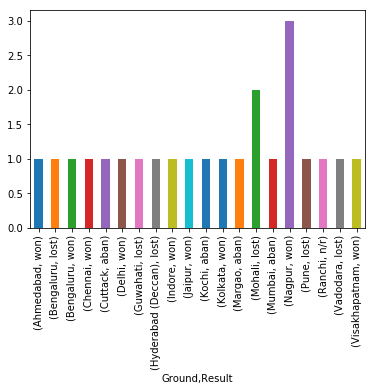

In [20]:
# considering india Vs Australia in Indian venues in the last 10 years,
result =team_result[['Team','Result','Ground']] 

df = result.groupby(['Ground','Result']).size()
print (df)

df.plot(kind='bar')


### Based on Venue of ODI details
Winner of the series (03): India (since 3 won by India)
Series output (04)
1 ODI - > Australia (history Hyderabad India Loses)
2 ODI -> India (won 3 times in Nagpur)
3 ODI -> India (Ranchi)
4 ODI -> Aus (Mohali Lost)
5 ODI -> India (Delhi)

Highest run scorer (02) -> Virat Kohli

Maximum sixes (02): -> Rohit Sharma

Maximum fours (02):  -> Virat Kohli

In [21]:
bowling = pd.merge(bowling, squad, how='left',left_on='Player', right_on='Matching_Name')  #Do not require stats of people not in squad
bowling = bowling[~bowling.isin([np.nan, np.inf, -np.inf]).any(1)]
bowling.head()

,Player,Overs,Mdns,Runs,Wkts,Econ,Inns,Opposition,Ground,Start Date,country,role,odi number,Matching_Name
0,YS Chahal,10.0,0,42,6,4.20,1,v Australia,Melbourne,18-01-2019,ind,Bowler,all,YS Chahal
4,KW Richardson,10.0,1,68,5,6.80,2,v India,Canberra,20-01-2016,aus,Bowler,all,KW Richardson
6,JA Richardson,10.0,2,26,4,2.60,2,v India,Sydney,12-01-2019,aus,Bowler,all,JA Richardson
7,B Kumar,10.0,0,45,4,4.50,1,v Australia,Adelaide,15-01-2019,ind,Bowler,"3,4,5",B Kumar
13,B Kumar,6.1,2,9,3,1.45,2,v Australia,Kolkata,21-09-2017,ind,Bowler,"3,4,5",B Kumar


In [22]:
bowling[["Overs","Runs","Econ","Wkts"]] = bowling[["Overs","Runs","Econ","Wkts"]].apply(pd.to_numeric) #
bowling ['balls_bowled'] = (bowling ['Overs'] % 1) *10 + (bowling ['Overs']// 1) *6 
##to calculate bowler strike rate by calculating total balls bowled
# a strike rate of 10 indicates the bowler is likely to get a wicket once in 10 balls 
# lower the strike rate higher is the bowler efficiency
bowling .head()

,Player,Overs,Mdns,Runs,Wkts,Econ,Inns,Opposition,Ground,Start Date,country,role,odi number,Matching_Name,balls_bowled
0,YS Chahal,10.0,0,42,6,4.20,1,v Australia,Melbourne,18-01-2019,ind,Bowler,all,YS Chahal,60.0
4,KW Richardson,10.0,1,68,5,6.80,2,v India,Canberra,20-01-2016,aus,Bowler,all,KW Richardson,60.0
6,JA Richardson,10.0,2,26,4,2.60,2,v India,Sydney,12-01-2019,aus,Bowler,all,JA Richardson,60.0
7,B Kumar,10.0,0,45,4,4.50,1,v Australia,Adelaide,15-01-2019,ind,Bowler,"3,4,5",B Kumar,60.0
13,B Kumar,6.1,2,9,3,1.45,2,v Australia,Kolkata,21-09-2017,ind,Bowler,"3,4,5",B Kumar,37.0


In [23]:
bowling_select = bowling[['Player','Overs','balls_bowled','Runs','Wkts']]
bowling_select = bowling_select.groupby(['Player']).agg(['sum'])
bowling_select ['strike_rate'] = bowling_select ['balls_bowled']/bowling_select ['Wkts']
bowling_select ['economy'] = bowling_select ['Runs']/bowling_select ['balls_bowled'] * 6
bowling_select = bowling_select[~bowling_select.isin([np.nan, np.inf, -np.inf]).any(1)]
bowling_select.head(10)

,Overs,balls_bowled,Runs,Wkts,strike_rate,economy
,sum,sum,sum,sum,,
Player,,,,,,
A Zampa,37.0,222.0,222,4,55.500000,6.000000
B Kumar,125.6,756.0,654,16,47.250000,5.190476
GJ Maxwell,51.3,309.0,314,2,154.500000,6.097087
JA Richardson,30.0,180.0,112,6,30.000000,3.733333
JJ Bumrah,41.0,246.0,202,7,35.142857,4.926829
KM Jadhav,23.0,138.0,121,2,69.000000,5.260870
KW Richardson,56.5,341.0,335,13,26.230769,5.894428
Kuldeep Yadav,54.0,324.0,330,9,36.000000,6.111111


In [24]:
#filter bowlers who have bowled more than 20 overs
bowling_select = bowling_select.sort_values(by = 'strike_rate', ascending = True) 
bowling_select.head(10)

,Overs,balls_bowled,Runs,Wkts,strike_rate,economy
,sum,sum,sum,sum,,
Player,,,,,,
YS Chahal,43.0,258.0,214,12,21.500000,4.976744
RG Sharma,8.0,48.0,60,2,24.000000,7.500000
KW Richardson,56.5,341.0,335,13,26.230769,5.894428
JA Richardson,30.0,180.0,112,6,30.000000,3.733333
JJ Bumrah,41.0,246.0,202,7,35.142857,4.926829
NM Coulter-Nile,59.0,354.0,331,10,35.400000,5.610169
Kuldeep Yadav,54.0,324.0,330,9,36.000000,6.111111
Mohammed Shami,81.6,492.0,485,13,37.846154,5.914634


### Based on Bowling Statistics
Chahal has the best strike rate and economy less than 5 and considering that Indian favours spin, Chahal would be the ont the make the most wickets.

### Consolidate
Winner of the series: India

Series output 

1 ODI - > Australia (Hyderabad)
2 ODI -> India (Nagpur)
3 ODI -> India (Ranchi)
4 ODI -> Aus (Mohali)
5 ODI -> India (Delhi)

Highest run scorer -> Virat Kohli

Maximum sixes  -> Rohit Sharma

Maximum fours  -> Virat Kohli

Maximum Wickets -> Yuzvendra Chahal
